In [25]:
import csv
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import seaborn as sns

created_times = np.array([])
arrived_times = np.array([])
latencies = np.array([])
counters = np.array([])

# omit .csv ending
datafile = 'processed_data/one_to_one/5_active_slots/5as_50k_1_1_p'

with open(datafile + '.csv') as csvfile:
    raw_data = csv.reader(csvfile, delimiter=',')

    for row in raw_data:
        counters = np.append(counters, row[0])
        latencies = np.append(latencies, float(row[1]))
        #created_times = np.append(created_times, float(row[1]))
        #arrived_times = np.append(arrived_times, float(row[2]))

/Users/arvindsundararajan/Library/Python/3.4/lib/python/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [26]:
# latencies = np.subtract(arrived_times, created_times)
# latencies

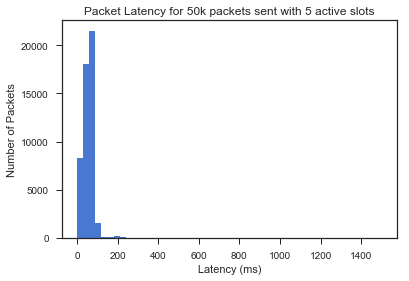

In [27]:
# distribution of latencies
x = plt.hist(latencies, bins=50, range=(0,1500))
plt.title("Packet Latency for 50k packets sent with 5 active slots")
plt.xlabel("Latency (ms)")
plt.ylabel("Number of Packets")
plt.savefig(datafile + '_hist.png', dpi=1200)
plt.show()

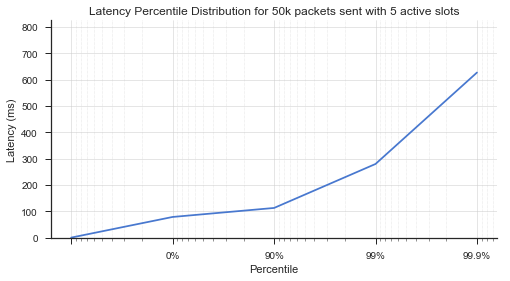

In [28]:
# creates the percentile distribution graph

clear_bkgd = {'axes.facecolor':'none', 'figure.facecolor':'none'}
sns.set(style='ticks', context='notebook', palette="muted", rc=clear_bkgd)

percentiles = [0] + [100-1/10**i for i in range(-1,4)] # 90, 99, 99.9, 99.99, etc.
x = percentiles[:len(str(len(latencies)))]
y = [np.percentile(latencies, percentile) for percentile in percentiles]
y = y[:len(str(len(latencies)))]
num_intervals = 4

# Start with hard-coded lengths for 0,90,99
# Rest of array generated to display correct number of decimal places as precision increases
lengths = [1,2,2] + [int(v)+1 for v in list(np.arange(3,num_intervals+2))]

# Build the label string by trimming on the calculated lengths and appending %
labels = [str(v)[0:l] + "%" for v,l in zip(percentiles, lengths)]

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xscale('log')
axes = plt.gca()
axes.set_ylim([0,max(latencies)])
plt.gca().invert_xaxis()
# Labels have to be reversed because axis is reversed
ax.xaxis.set_ticklabels( labels[::-1] )

ax.plot([100.0 - v for v in x], y)

ax.grid(True, linewidth=0.5, zorder=5)
ax.grid(True, which='minor', linewidth=0.5, linestyle=':')
sns.despine(fig=fig)

plt.title("Latency Percentile Distribution for 50k packets sent with 5 active slots")
axes.set_xlabel("Percentile")
axes.set_ylabel("Latency (ms)")
plt.savefig(datafile + '_percentile_dist.png', dpi=1200)
plt.show()

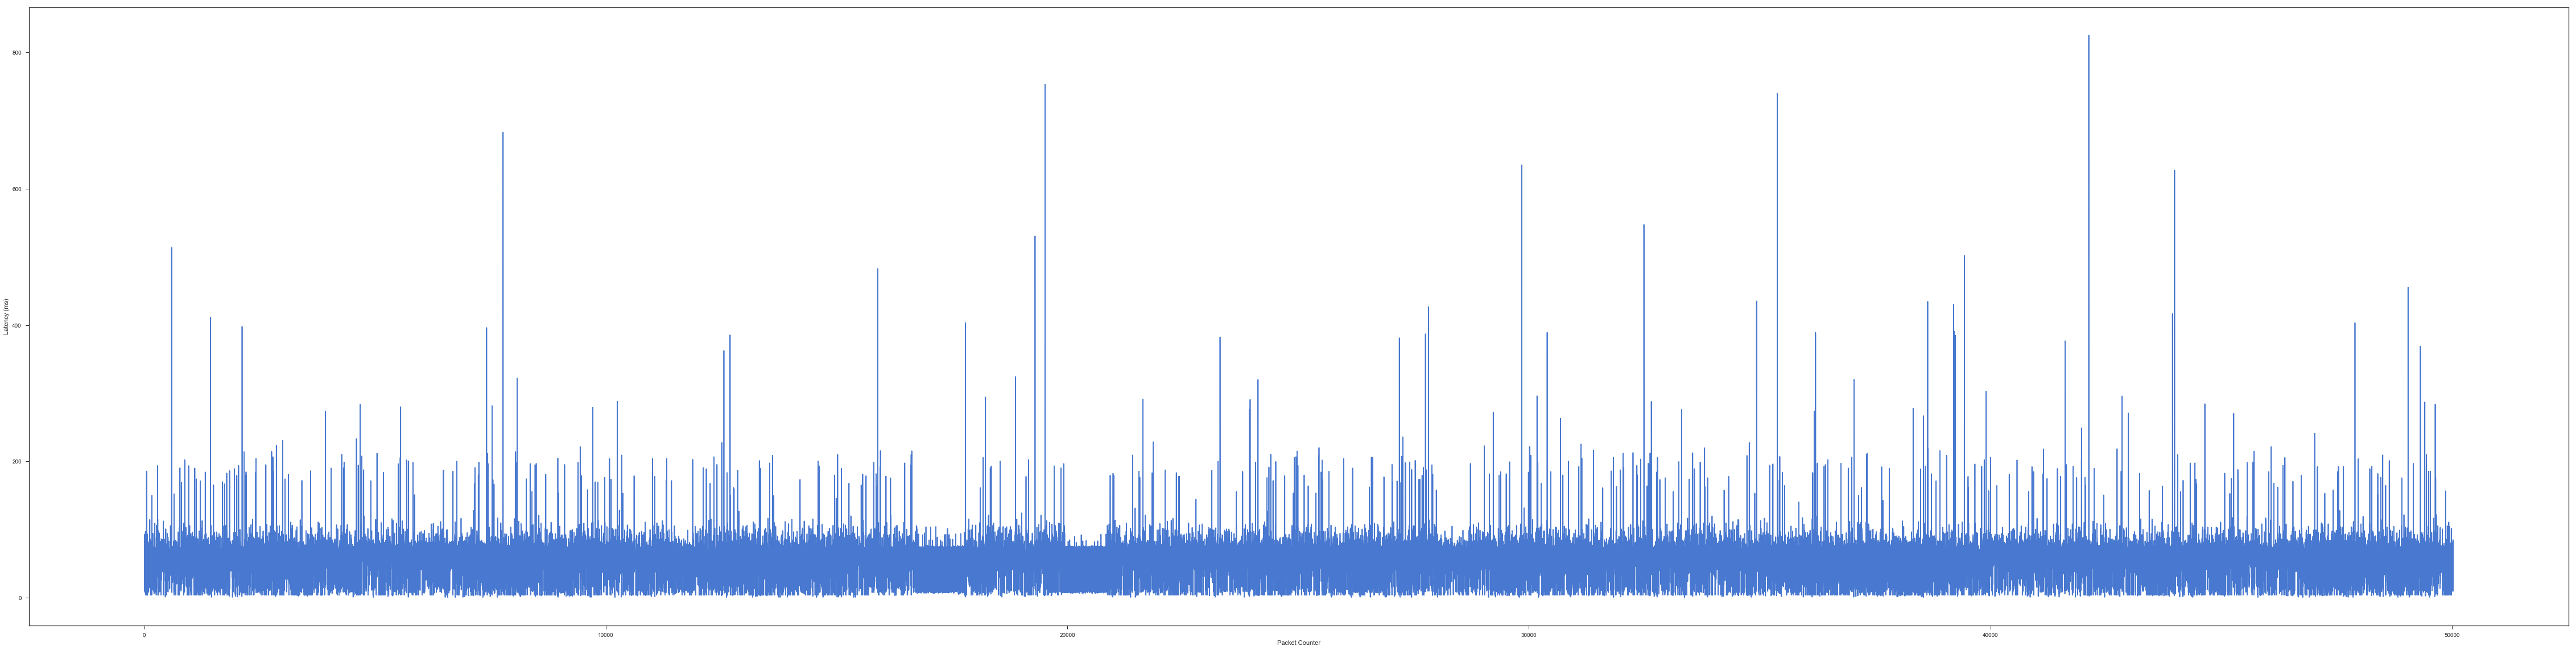

In [29]:
fig, ax = plt.subplots(figsize=(80, 20))
plt.plot(counters, latencies)
plt.xlabel("Packet Counter")
plt.ylabel("Latency (ms)")
plt.show()